# Introduction to Data Science – Project
*COMP 5360 / MATH 4100, University of Utah, http://datasciencecourse.net/*

Project Super Bowl 55 winner based on in season statistics Correlation study on offense/defense statistics to determine key prediction factors. Use machine learning to predict final standings of playoffs.

## Your Data
First Name: Scott
<br>  
Last Name: Stack
<br>  
E-mail: u0664997@utah.edu
<br>  
UID:  u0664997
<br> 

First Name: Will
<br>  
Last Name: Gilliland
<br>  
E-mail: u0680231@utah.edu
<br>  
UID:  u0680231
<br> 

## Background and Motivation. 


The goal of this analysis is to scrape web data for in-season National Football League (NFL) team statistics and project a ranking of probability to win Super Bowl 55. Some of the ambitions of this project include a correlation study on team defense and offense statistics to find key predictors of win percentage and train a model to rank teams for post-season playoffs and project a winner. This model can be confirmed because there is a known ranking in the 2020 post-season (i.e. Tampa Bay won SB55 over Kansas City). The interesting points will be which statistics correlate and can predict the outcome of a team's season. 

Partly motivating this research is if a model can be sufficiently accurate, perhaps this can be updated with future/current data to predict team standings and future winners. What makes each year unique is the high turnover and injury rate in the NFL, so a team's current makeup is not necessarily a good indication of future performance. It will be key to narrow the scope of the project as there are many variables that can change outcomes. For instance, there is a popular saying that 'Defense wins championships,' and the motivation for this project is to test this popular hypothesis. NFL teams that have strong defenses have appeared to win in most recent years but is this actually true? This hypothesis motivates questions like: are there in-season team statistics which can predict future wins?

The analysis presented in this project will aim to outline these key statistics, correlation, and probability rankings of the 2020 season, with the ambition to train models to predict future rankings. 

## Project Objectives. 

The primary objective is finding key statistics from team offense and defense that correlates with wins. High-powered offense seems to suggest that a team can win games easily, like the Kansas City Chiefs, with a high point differential over other teams. On the other hand, a stonewall defense typically suggests a team can win by reducing the point differential and winning close games. Does one strength favor another when it comes to winning the post-season or do balanced teams have the advantage? This study aims to model past team statistics to definitively answer this question and project a champion based on current statistics. There is a known winner for every season and the model accuracy can be confirmed. 

## Data. 
The data for the project will be obtained from [Pro Football Reference](https://www.pro-football-reference.com/), specifically the pages containing data from each year, i.e., [2007](https://www.pro-football-reference.com/years/2007/). Pages for each year readily contain team-based stats for the year as well as conference standings and results, which is the data that will be used to create models to make predictions. The intended method to obtain data will to be to scrape the site using the libraries [urllib](https://docs.python.org/3/library/urllib.html) to create HTML files for each page and [Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) to gather relevent data from each url. The site is structured such that a for-loop can easily be written to collect data over a desired range of years.

Based on the site's [terms of use](https://www.sports-reference.com/termsofuse.html) section 5. Permitted Use subsections (i) and (j):
- "(i) without our express written permission, use any automated means to access or use the Site, including scripts, bots, scrapers, data miners, or similar software, in a manner that adversely impacts site performance or access; or"
- (j) use any material or Content from the Site, including without limitation any statistics or data, (i) to create any database, archive, or other data store that competes with or constitutes a material substitute for the services or data stores offered on the Site or (ii) to provide any service that competes with or constitutes a material substitute for the services or data stores offered on the Site"

From these statements, the intended use for the project to quickly scrape data in a matter that will not slow traffic, makes changes to, or compete with the site is allowed without express permission.

## Ethical considerations. 

There are incentives for many people to be interested in predicting future outcomes based on team statistics. General managers and coaches wishing to build a strong team may be interested in choosing draft or trade targets that enhance their chances of winning. Knowing if they need to focus on improving specific statistics can influence their strategy. Likewise, people that are interested in placing bets could be very interested in having a level of certainty. 

There are some biased factors that seem to have an influence on a team's success. For example, having an experienced post-season quarterback like Tom Brady may change the expected outcome of the team's success just based on their in-season win-loss record. Or, does the home-field 'advantage' have more influence on the outcomes than we think? Some biases can be treated as a binary variable and possibly show correlation while others may be difficult to capture.

## Data Processing. 

Write about data processing here

The data was initially assumed to be simply formatted in tables, however the reference website separates 'Team Offense', 'Team Defense', and 'Win/Loss Record' in different tables. The variables in these tables were extracted and merged together to obtain a complete dataframe with statistics believed to be meaningful. Special characters included in the html code to demark specific teams clinching a bye week or wildcard spot in the playoffs were stripped. Other data not explicitly present in the tables was if a team won the SuperBowl. This categorical variable was added to the dataframe as binary, meaning a win = 1 and a loss = 0. 

In [2]:
from bs4 import BeautifulSoup,Comment
import urllib.request
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import seaborn as sns
from sklearn import linear_model
from sklearn.cluster import KMeans
sns.set()

#to get soup for 2020 team offense using Comment, used below
url = "https://www.pro-football-reference.com/years/2020/"
soup = BeautifulSoup(requests.get(url).content, 'html.parser')
table = soup.select_one('#all_team_stats').find_next(text=lambda t: isinstance(t, Comment))
table = BeautifulSoup(table, 'html.parser')

#function to rename columns to unique Offense/Defense data and columns that are missing titles from HTML table
def rename_cols(df):
    dict = {'Unnamed: 0_level_0':'TotOff',
            'Unnamed: 1_level_0':'TotOff',
            'Unnamed: 2_level_0':'TotOff',
            'Unnamed: 3_level_0':'TotOff',
            'Unnamed: 4_level_0':'TotOff',
            'Passing' : 'O_Passing',
            'Rushing' : 'O_Rushing',
            'Penalties': 'O_Penalties',
            'Tot Yds & TO':'TotOff',
            'Unnamed: 8_level_0':'TotOff',
            'Unnamed: 9_level_0':'TotOff',
            'Unnamed: 25_level_0':'O_Score%',
            'Unnamed: 26_level_0':'O_TurnOver%',
            'Unnamed: 27_level_0':'O_EXP',}
        
    # call rename() method
    df.rename(columns=dict,inplace=True)
    return(df)

def rename_cols_DEF(df):
    dict = {'Unnamed: 0_level_0':'TotDef',
            'Unnamed: 1_level_0':'TotDef',
            'Unnamed: 2_level_0':'TotDef',
            'Unnamed: 3_level_0':'TotDef',
            'Unnamed: 4_level_0':'TotDef',
            'Passing' : 'D_Passing',
            'Rushing' : 'D_Rushing',
            'Penalties': 'D_Penalties',
            'Tot Yds & TO':'TotDef',
            'Unnamed: 8_level_0':'TotDef',
            'Unnamed: 9_level_0':'TotDef',
            'Unnamed: 25_level_0':'D_Score%',
            'Unnamed: 26_level_0':'D_TurnOver%',
            'Unnamed: 27_level_0':'D_EXP',}
        
    # call rename() method
    df.rename(columns=dict,inplace=True)
    return(df)


#Get Team Offense Data
#for loop to get data for X years
year = 2020
#URL for website data
url = "https://www.pro-football-reference.com/years/"
urls = []
OFFdfs = []
for index in np.arange(10):
    #create URL for BeautifulSoup
    urls.append(url + str(year - index) +'/')
    years = year - index

count = 0
for index in urls:
    soup = BeautifulSoup(requests.get(index).content, 'html.parser')
    table = soup.select_one('#all_team_stats').find_next(text=lambda t: isinstance(t, Comment))
    table = BeautifulSoup(table, 'html.parser')    
    #create DF from html table, drop last 3 rows of data 
    OFFdf = pd.read_html(str(table))[0]
    curr_year = year - count
    OFFdf['Year'] = curr_year
    OFFdfs.append(OFFdf[:-3])
    count+=1


#initialize Master Team Offense Dataframe    
MasterOFF = OFFdfs[0]

for i in range(len(OFFdfs)-1):    
    #append DF to master, reset index to continuous
    MasterOFF = MasterOFF.append(OFFdfs[i+1],ignore_index = True)

#rename columns to useful index    
MasterOFF = rename_cols(MasterOFF)
#drop multi-index
MasterOFF.columns = ['_'.join(col) for col in MasterOFF.columns]
#cleanup Year column index
MasterOFF.rename(columns={'Year_':'Year'},inplace=True)


#Get Team Defense Data
#URL for website data
url = "https://www.pro-football-reference.com/years/"
urls = []
year = 2020
DEFdfs = []
ADV_DEFdf = []
Team_Sacks = pd.DataFrame(['Tm','Sk'])
for index in np.arange(10):
    #create URL for BeautifulSoup
    urls.append(url + str(year - index) +'/opp.htm')
    years = year - index

    
#mask for advanced_defense table data
sacks = ['Tm','Sk','Year']

#team_stats table does not include Sacks, so need passing table data and merge tables.
count = 0
for index in urls:
    curr_year = year - count
    soup = BeautifulSoup(requests.get(index).content, 'html.parser')
    table = soup.find('table', id = 'team_stats') 
    table2 = soup.select_one('#all_passing').find_next(text=lambda t: isinstance(t, Comment))
    table2 = BeautifulSoup(table2, 'html.parser')
    #create DF from html table, drop last 3 rows of data 
    DEFdf = pd.read_html(str(table))[0]
    DEFdf.drop(DEFdf.tail(3).index, inplace = True)
    #rename each DF
    rename_cols_DEF(DEFdf)
    #add year data
    DEFdf['Year'] = curr_year
    #drop multi-index
    DEFdf.columns = ['_'.join(col) for col in DEFdf.columns]
    
    ADV_DEFdf = pd.read_html(str(table2))[0]
    ADV_DEFdf.drop(ADV_DEFdf.tail(3).index,inplace = True)
    ADV_DEFdf['Year'] = curr_year
    #apply mask
    Team_Sacks = ADV_DEFdf[sacks].copy()
    #intermediate step prior to appending data. merges team_stats and team sacks data 
    DEFdf_interm = pd.merge(DEFdf,Team_Sacks, left_on =['TotDef_Tm'], right_on = ['Tm'] )
    #append to list of team defense data
   
    DEFdfs.append(DEFdf_interm)
    count+=1


#initialize master DataFrame with first list of Team Defense data
MasterDEF = DEFdfs[0]

for i in range(len(DEFdfs)-1):    
    #append DF to master, reset index to continuous
    MasterDEF = MasterDEF.append(DEFdfs[i+1],ignore_index = True)
    
MasterDEF.drop('Tm',axis = 1,inplace=True)
MasterDEF.drop('Year_',axis = 1,inplace=True)


#get standings inlcuding win-loss record
#for loop to get data for X years
year = 2020
#URL for website data
url = "https://www.pro-football-reference.com/years/"
urls = []
AFCStandDfs = []
NFCStandDfs = []
for index in np.arange(10):
    #create URL for BeautifulSoup
    urls.append(url + str(year - index) +'/')
    years = year - index
count = 0
for index in urls:
    soup = BeautifulSoup(requests.get(index).content, 'html.parser')
    #AFCtable = soup.select('table', id='AFC')
    #NFCtable = soup.select('table', id='NFC')
    AFCtable = soup.findAll('table', {'id':['AFC']})
    NFCtable = soup.findAll('table', {'id':['NFC']})
    AFCStandDf = pd.read_html(str(AFCtable))[0]
    NFCStandDf = pd.read_html(str(NFCtable))[0]
    curr_year = year - count
    AFCStandDf['Year'] = curr_year
    AFCStandDfs.append(AFCStandDf)
    NFCStandDf['Year'] = curr_year
    NFCStandDfs.append(NFCStandDf)    
    count+=1


#initialize Dataframe    
AFCStandings = AFCStandDfs[0]
NFCStandings = NFCStandDfs[0]
for i in range(len(AFCStandDfs)-1):    
    #append DF, reset index to continuous
    AFCStandings = AFCStandings.append(AFCStandDfs[i+1],ignore_index = True)
for i in range(len(NFCStandDfs)-1):
    NFCStandings = NFCStandings.append(NFCStandDfs[i+1],ignore_index = True)

#drop conference labels (north,east,west,south)    
AFCStandings.drop(AFCStandings.index[0:len(AFCStandings):5], inplace = True)
NFCStandings.drop(NFCStandings.index[0:len(NFCStandings):5], inplace = True)

#strip character marker
AFCStandings['Tm'] = AFCStandings['Tm'].str.rstrip('*'+'+')
NFCStandings['Tm'] = NFCStandings['Tm'].str.rstrip('*'+'+')

#combine standings
Standings = NFCStandings.append(AFCStandings)

Standings.drop(['MoV','SoS','SRS','OSRS','DSRS','PF','PA'],axis = 1,inplace = True)

#change object type to float
Standings['W'] = Standings['W'].astype(float)
Standings['L'] = Standings['L'].astype(float)
Standings['T'] = Standings['T'].astype(float)
Standings['W-L%'] = Standings['W-L%'].astype(float)
Standings['PD'] = Standings['PD'].astype(float)


#get playoff results data
#includes winner and score
#for loop to get data for X years
year = 2020
#URL for website data
url = "https://www.pro-football-reference.com/years/"
urls = []
PlayOffdfs = []
for index in np.arange(10):
    #create URL for BeautifulSoup
    urls.append(url + str(year - index) +'/')
    years = year - index

count = 0
for index in urls:
    soup = BeautifulSoup(requests.get(index).content, 'html.parser')
    table = soup.select_one('#all_playoff_results').find_next(text=lambda t: isinstance(t, Comment))
    table = BeautifulSoup(table, 'html.parser') 
    PlayOffdf = pd.read_html(str(table))[0]
    curr_year = year - count
    PlayOffdf['Year'] = curr_year
    PlayOffdfs.append(PlayOffdf)
    count+=1


#initialize Playoffs Dataframe    
PlayOffs = PlayOffdfs[0]

for i in range(len(PlayOffdfs)-1):    
    #append DF, reset index to continuous
    PlayOffs = PlayOffs.append(PlayOffdfs[i+1],ignore_index = True)
SBWinner = PlayOffs.loc[PlayOffs['Week']=='SuperBowl']

#assigning binary superbowl win column to master team offense dataframe.
#this block should be put into a for loop

MasterOFF[('SB_Win')] = 0

row = MasterOFF.loc[(MasterOFF[('TotOff_Tm')] == 'Tampa Bay Buccaneers') & (MasterOFF['Year'] == 2020)].index
MasterOFF.at[row[0],('SB_Win')] = 1
row = MasterOFF.loc[(MasterOFF[('TotOff_Tm')] == 'Kansas City Chiefs') & (MasterOFF['Year'] == 2019)].index
MasterOFF.at[row[0],('SB_Win')] = 1
row = MasterOFF.loc[(MasterOFF[('TotOff_Tm')] == 'New England Patriots') & (MasterOFF['Year'] == 2018)].index
MasterOFF.at[row[0],('SB_Win')] = 1
row = MasterOFF.loc[(MasterOFF[('TotOff_Tm')] == 'Philadelphia Eagles') & (MasterOFF['Year'] == 2017)].index
MasterOFF.at[row[0],('SB_Win')] = 1
row = MasterOFF.loc[(MasterOFF[('TotOff_Tm')] == 'New England Patriots') & (MasterOFF['Year'] == 2016)].index
MasterOFF.at[row[0],('SB_Win')] = 1
row = MasterOFF.loc[(MasterOFF[('TotOff_Tm')] == 'Denver Broncos') & (MasterOFF['Year'] == 2015)].index
MasterOFF.at[row[0],('SB_Win')] = 1
row = MasterOFF.loc[(MasterOFF[('TotOff_Tm')] == 'New England Patriots') & (MasterOFF['Year'] == 2014)].index
MasterOFF.at[row[0],('SB_Win')] = 1
row = MasterOFF.loc[(MasterOFF[('TotOff_Tm')] == 'Seattle Seahawks') & (MasterOFF['Year'] == 2013)].index
MasterOFF.at[row[0],('SB_Win')] = 1
row = MasterOFF.loc[(MasterOFF[('TotOff_Tm')] == 'Baltimore Ravens') & (MasterOFF['Year'] == 2012)].index
MasterOFF.at[row[0],('SB_Win')] = 1
row = MasterOFF.loc[(MasterOFF[('TotOff_Tm')] == 'New York Giants') & (MasterOFF['Year'] == 2011)].index
MasterOFF.at[row[0],('SB_Win')] = 1

#Combine Offense and Defense Dataframes
DF_OFF_DEF = pd.merge(MasterOFF,MasterDEF, left_on =['TotOff_Tm','Year'], right_on = ['TotDef_Tm','Year'], how = 'left' )

#merge offense, defense, and standings data
DF= pd.merge(DF_OFF_DEF,Standings, left_on =['TotOff_Tm','Year'], right_on = ['Tm','Year'])
DF.drop(['TotOff_Tm','TotDef_Tm','TotOff_G','TotDef_G'],axis = 1,inplace = True)

DF.head()

,TotOff_Rk,TotOff_PF,TotOff_Yds,TotOff_Ply,TotOff_Y/P,TotOff_TO,TotOff_FL,TotOff_1stD,O_Passing_Cmp,O_Passing_Att,...,D_Score%_Sc%,D_TurnOver%_TO%,D_EXP_EXP,Sk,Tm,W,L,T,W-L%,PD
0,1.0,509.0,6224.0,990.0,6.3,11.0,6.0,358.0,372.0,526.0,...,39.9,11.4,-109.67,41.0,Green Bay Packers,13.0,3.0,0.0,0.813,140.0
1,2.0,501.0,6343.0,1034.0,6.1,22.0,11.0,397.0,410.0,596.0,...,39.4,15.3,-123.10,38.0,Buffalo Bills,13.0,3.0,0.0,0.813,126.0
2,3.0,492.0,6145.0,1017.0,6.0,17.0,5.0,364.0,410.0,626.0,...,33.7,14.0,-22.04,48.0,Tampa Bay Buccaneers,11.0,5.0,0.0,0.688,137.0
3,4.0,491.0,6343.0,1031.0,6.2,12.0,5.0,381.0,316.0,485.0,...,45.2,13.3,-185.20,19.0,Tennessee Titans,11.0,5.0,0.0,0.688,52.0
4,5.0,482.0,6023.0,1045.0,5.8,17.0,9.0,367.0,370.0,522.0,...,34.7,13.1,-40.02,45.0,New Orleans Saints,12.0,4.0,0.0,0.750,145.0


##  Analysis.
The data sets that will be used will contain many variables and it will be important to explore these to find which variables are predictive. The main exploratory visualization will be the use of a correlation matrix. The results from this exploration should allow the removal of variables that do not appear to be predictive. This will allow for the creation of more accurate models used for analysis. 

Further exploration of these variables will be completed using a regression and predictiveness decided on the $R^2$ value for a regression model and the p-values for each variable. Since the dependent variable is a categorical variable (SB win-loss) a logit model will be used opposed to a linear model. The highest p-value for each model will be dropped in successive models, checking that the $R^2$ value has not had major decreases from the removal of that variable. Since the data set being used includes a ranking based on calculations done prior to this project this process will be done twice, once using these rankings and once without.

The first analysis method used will be a regression to aid in exploratory analysis. Further, a multiple regression will be used to compute a probability for a given team winning based on their stats. The probabilities to win can be vizualised as a curve to see the distribution of win probability. 

** Desribe clustering methods **

The second method will be classification using a k-nearest-neighbors and/or support-vector-machine. These classifaction models will first have parameters optimized based on accuracy of the model. After splitting the data into training and testing sets, the optimized model can be fit to the training set. The accuracy of the model on the testing set will confirm if the model is useful. This will be visualized with a classifcation cluster with decision boundaries. With a prediction that is binary, either a team wins the superbowl or they don't, this visualization method should allow for clear visualization of the accuracy of a model's prediction.


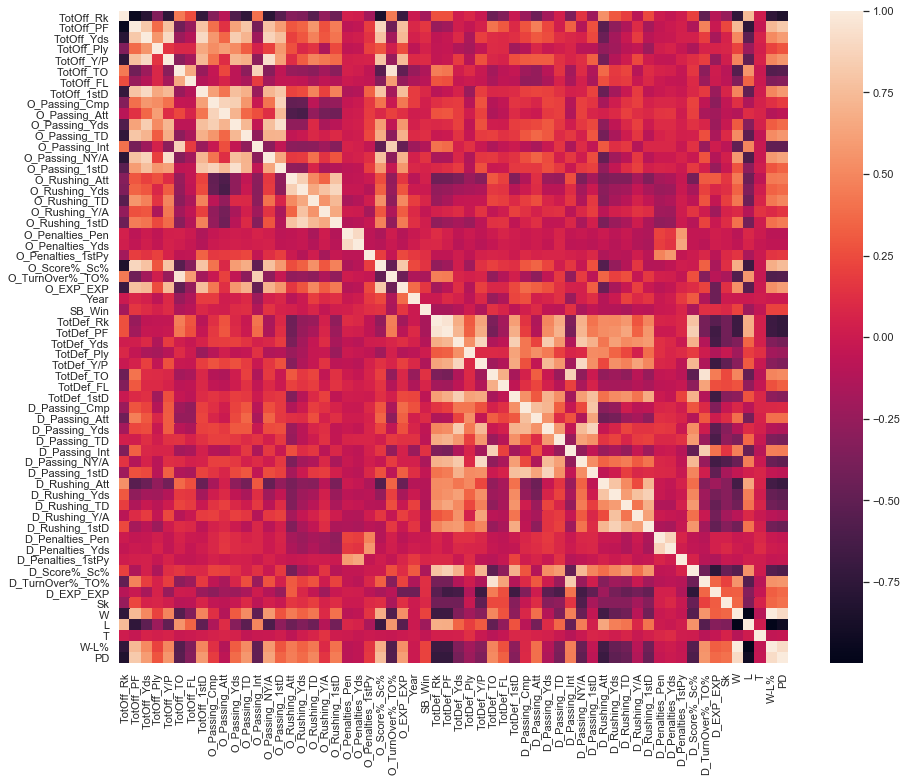

In [26]:
Var_Corr = DF.corr()
# plot the heatmap and annotation on it
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, ax = ax)

In [27]:
# Create new DFs without the 2020 season 
mask = (DF['Year'] != 2020)
DF_pre20 = DF[mask]
y_logit_train = DF_pre20['SB_Win']
X_logit_train = DF_pre20.drop(columns=['SB_Win', 'O_Score%_Sc%','O_TurnOver%_TO%','O_Rushing_Y/A','TotOff_Y/P','O_Passing_NY/A',
                                      'D_Passing_NY/A', 'TotDef_Y/P','D_Passing_NY/A','D_Rushing_Y/A','D_Score%_Sc%', 
                                      'D_TurnOver%_TO%'])
y_logit_train = DF_pre20['SB_Win']
X_logit_train2 = X_logit_train
offense_vars = []
defense_vars = ['Sk']
for col in X_logit_train2.columns:
    if 'O_' in col or 'Off' in col:
        offense_vars.append(col)
    if 'D_' in col or 'Def' in col:
        defense_vars.append(col)
off_cols_string = ' + '.join(offense_vars)
f = 'SB_Win ~ ' + off_cols_string

current_off_cols = []
for col in offense_vars:
    current_off_cols.append(col)
    rhs = ' + '.join(current_off_cols)
    f1 = 'SB_Win ~ ' + rhs
    try:
        off_logit_model = sm.logit(formula = f1, data = DF_pre20).fit(maxiter=10000,disp=0)
    except np.linalg.LinAlgError:
        current_off_cols = current_off_cols[0:-1]
        print(col+' results in a singular matrix and was dropped')
        continue
        
current_cols = current_off_cols
for col in defense_vars:
    current_cols.append(col)
    rhs = ' + '.join(current_cols)
    f1 = 'SB_Win ~ ' + rhs
    try:
        logit_model = sm.logit(formula = f1, data = DF_pre20).fit(maxiter=10000,disp=0)
    except np.linalg.LinAlgError:
        current_cols = current_cols[0:-1]
        print(col+' results in a singular matrix and was dropped')
        continue
        
        
no_nan_col = []
for i, p_value in enumerate(logit_model.pvalues[1:]):
    if np.isnan(p_value):
        continue
    else:
        no_nan_col.append(current_off_cols[i])

f2 = 'SB_Win ~ '+ ' + '.join(no_nan_col)
logit_model2 = sm.logit(formula = f2, data = DF_pre20).fit(maxiter=10000,disp=0)
logit_model2.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


O_Rushing_Yds results in a singular matrix and was dropped


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check

D_Passing_TD results in a singular matrix and was dropped


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


D_Passing_1stD results in a singular matrix and was dropped


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


D_Rushing_Yds results in a singular matrix and was dropped
D_Rushing_TD results in a singular matrix and was dropped
D_Rushing_1stD results in a singular matrix and was dropped
D_Penalties_Pen results in a singular matrix and was dropped
D_Penalties_Yds results in a singular matrix and was dropped
D_Penalties_1stPy results in a singular matrix and was dropped
D_EXP_EXP results in a singular matrix and was dropped


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:1354: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 SB_Win   No. Observations:                  288
Model:                          Logit   Df Residuals:                      266
Method:                           MLE   Df Model:                           21
Date:                Sun, 25 Apr 2021   Pseudo R-squ.:                  0.4972
Time:                        19:32:08   Log-Likelihood:                -20.136
converged:                       True   LL-Null:                       -40.050
Covariance Type:            nonrobust   LLR p-value:                  0.007806
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          18.1261     26.794      0.677      0.499     -34.388      70.640
TotOff_Rk          -0.5905      0.293     -2.018      0.044      -1.164      -0.017
TotOff_PF          -0.0406      0.036     -1.135      0.257      -0.111       0.030
TotOff_Yds         -0.0062      0.004     -1.686      0.092      -0.013       0.001
TotOff_Ply         -0.0612      0.074     -0.822      0.411      -0.207       0.085
TotOff_TO          -0.0096   6.26e+05  -1.53e-08      1.000   -1.23e+06    1.23e+06
TotOff_FL           0.0392   6.26e+05   6.26e-08      1.000   -1.23e+06    1.23e+06
O_Passing_Cmp      -0.1194      0.057     -2.100      0.036      -0.231      -0.008
O_Passing_Att       0.1108      0.085      1.309      0.191      -0.055       0.277
O_Passing_Yds       0.0095      0.005      2.043      0.041       0.000       0.019
O_Passing_TD       -0.1034      0.222     -0.466      0.641      -0.538       0.331
O_Passing_Int      -0.0497   6.26e+05  -7.95e-08      1.000   -1.23e+06    1.23e+06
O_Rushing_Att       0.0723      0.072      1.004      0.315      -0.069       0.214
O_Rushing_TD        0.0087      0.248      0.035      0.972      -0.477       0.494
O_Penalties_Pen    -0.0902      0.092     -0.983      0.326      -0.270       0.090
O_Penalties_Yds     0.0184      0.010      1.778      0.075      -0.002       0.039
O_EXP_EXP           0.0076      0.010      0.757      0.449      -0.012       0.027
TotDef_Rk          -0.4137      0.311     -1.329      0.184      -1.024       0.197
TotDef_PF           0.0226      0.044      0.516      0.606      -0.063       0.108
TotDef_Yds         -0.0042      0.004     -1.056      0.291      -0.012       0.004
TotDef_1stD         0.0631      0.056      1.127      0.260      -0.047       0.173
D_Passing_Cmp      -0.0336      0.037     -0.920      0.357      -0.105       0.038
D_Passing_Yds       0.0047      0.004      1.127      0.260      -0.003       0.013
===================================================================================

Possibly complete quasi-separation: A fraction 0.43 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [28]:
# This section shows the manual variable elimination based on p-value and R^2 of each model
# Only one variable is eliminated at a time, but the section was ran repeatedly until a model with variables with p-value
# within a significance level of 0.2

vars_to_drop = ['O_Passing_Int','O_Rushing_TD','TotOff_FL','TotOff_TO','O_Passing_TD','TotDef_PF','TotOff_Ply','O_Rushing_Att',
               'TotDef_Yds','D_Passing_Yds','D_Passing_Cmp','O_EXP_EXP','O_Penalties_Pen','TotOff_Yds']

update_cols = []
for i, col in enumerate(no_nan_col):
    if col in vars_to_drop:
        continue
    else:
        update_cols.append(col)    
update_cols

f3 = 'SB_Win ~ '+ ' + '.join(update_cols)
logit_model3 = sm.logit(formula = f3, data = DF_pre20).fit(maxiter=10000,disp=0)
logit_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 SB_Win   No. Observations:                  288
Model:                          Logit   Df Residuals:                      279
Method:                           MLE   Df Model:                            8
Date:                Sun, 25 Apr 2021   Pseudo R-squ.:                  0.4229
Time:                        19:32:08   Log-Likelihood:                -23.112
converged:                       True   LL-Null:                       -40.050
Covariance Type:            nonrobust   LLR p-value:                 4.279e-05
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -15.1832     10.071     -1.508      0.132     -34.922       4.556
TotOff_Rk          -0.3990      0.185     -2.151      0.031      -0.762      -0.035
TotOff_PF          -0.0281      0.020     -1.418      0.156      -0.067       0.011
O_Passing_Cmp      -0.0859      0.041     -2.102      0.036      -0.166      -0.006
O_Passing_Att       0.0499      0.023      2.126      0.034       0.004       0.096
O_Passing_Yds       0.0029      0.002      1.515      0.130      -0.001       0.007
O_Penalties_Yds     0.0091      0.003      2.708      0.007       0.003       0.016
TotDef_Rk          -0.3586      0.123     -2.918      0.004      -0.599      -0.118
TotDef_1stD         0.0416      0.023      1.799      0.072      -0.004       0.087
===================================================================================

Possibly complete quasi-separation: A fraction 0.33 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [29]:
# Predictions for 2020
mask = (DF['Year'] >= 2020)
DF_post20 = DF[mask]
teams = DF_post20['Tm']
preds = logit_model3.predict(exog=DF_post20)
ind_sort = np.argsort(-1*preds).tolist()    
for i in ind_sort[:5]:
    print('Team: '+teams[i]+'; Probability of SB Win: {:.2f}%'.format(preds[i]*100))

Team: Kansas City Chiefs; Probability of SB Win: 10.87%
Team: Baltimore Ravens; Probability of SB Win: 8.32%
Team: Tampa Bay Buccaneers; Probability of SB Win: 2.53%
Team: Buffalo Bills; Probability of SB Win: 1.10%
Team: New Orleans Saints; Probability of SB Win: 0.89%


In [30]:
# This section shows the manual variable elimination based on p-value and R^2 of each model without the total offense
# and defense ranking derived from the site where the data was obtained.

# Only one variable is eliminated at a time, but the section was ran repeatedly until a model with variables with p-value
# within a significance level of 0.2
vars_to_drop = ['TotOff_Rk','TotDef_Rk','O_Passing_Int','D_Passing_Cmp','TotDef_Yds','O_Rushing_TD','TotOff_FL',
               'TotDef_1stD','D_Passing_Yds','TotOff_Ply','TotOff_TO','O_Rushing_Att','O_Penalties_Pen','O_Passing_TD',
               'TotOff_PF','TotOff_Yds']

update_cols = []
for i, col in enumerate(no_nan_col):
    if col in vars_to_drop:
        continue
    else:
        update_cols.append(col)    
update_cols

f3 = 'SB_Win ~ '+ ' + '.join(update_cols)
logit_model3 = sm.logit(formula = f3, data = DF_pre20).fit(maxiter=10000,disp=0)
logit_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 SB_Win   No. Observations:                  288
Model:                          Logit   Df Residuals:                      281
Method:                           MLE   Df Model:                            6
Date:                Sun, 25 Apr 2021   Pseudo R-squ.:                  0.3416
Time:                        19:32:08   Log-Likelihood:                -26.368
converged:                       True   LL-Null:                       -40.050
Covariance Type:            nonrobust   LLR p-value:                 0.0001238
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -7.6423      4.826     -1.584      0.113     -17.101       1.816
O_Passing_Cmp      -0.0609      0.032     -1.901      0.057      -0.124       0.002
O_Passing_Att       0.0324      0.019      1.697      0.090      -0.005       0.070
O_Passing_Yds       0.0026      0.002      1.548      0.122      -0.001       0.006
O_Penalties_Yds     0.0077      0.003      2.384      0.017       0.001       0.014
O_EXP_EXP           0.0090      0.005      1.776      0.076      -0.001       0.019
TotDef_PF          -0.0314      0.010     -3.273      0.001      -0.050      -0.013
===================================================================================
"""

In [31]:
# Predictions for 2020
mask = (DF['Year'] >= 2020)
DF_post20 = DF[mask]
teams = DF_post20['Tm']
preds = logit_model3.predict(exog=DF_post20)
ind_sort = np.argsort(-1*preds).tolist()    
for i in ind_sort[:5]:
    print('Team: '+teams[i]+'; Probability of SB Win: {:.2f}%'.format(preds[i]*100))

Team: Kansas City Chiefs; Probability of SB Win: 12.94%
Team: Tampa Bay Buccaneers; Probability of SB Win: 2.47%
Team: Buffalo Bills; Probability of SB Win: 2.36%
Team: Baltimore Ravens; Probability of SB Win: 2.21%
Team: Indianapolis Colts; Probability of SB Win: 0.89%


## Logistic Regression Results. ##

After the process described in the exploritory analysis section was applied to the data, we are left with passing completions, passing attempts, passing yards, penalty yards, expected offense scoring, and points against. While the model was unable to correctly predict the winner, it was able to predict the two teams that would eventually make it to the superbowl as the top two probabilities. The highest probability, Kansas City Chiefs at 12.9%, were the favorites to win prior to the game. The Tampa Bay Buccaneers, 2.5%, on the otherhand entered at the fifth seed of the conference and were the underdog throughout the playoffs before eventually winning the superbowl. 

The variables listed above are based on a 0.15 confidence interval, which should be considered high, however based on the high variablity and large data set it was deemed acceptable. The resulting psuedo-$R^2$ value shows that only 34.2% of the variablity of the data set is explained using these variables and again, as previously stated, this was acceptable as the dataset used was known to have large variability. The model using Pro Football Reference's derived ranking stats had some changes in the desriptive variables, and accounted for 42.2% of the variablity, but were not used as the method of obtaining these rankings is unknown and based on previous work.

## Clustering Results.

Based off of the logistic regression results, kmeans clustering was implemented on this subset of variables showing stronger correlation to visualize the trend among teams. To determine $k$ the Within-Cluster-Sum-of-Squares ($WCSS$) method was used. $WCSS$ is the sum of squares of the distance from a data point in each cluster to its respective centroid. Plotting the $k$ value vs. the $WCSS$ returns an elbow plot where the optimal $k$ value is selected when the $WCSS$ value no longer decreases drastically when increasing $k$. The $k$ value used for this subset of data is 4. 

The kmeans model with $k$ = 4 was used to predict clusters of the data points, then each team was assigned to a cluster group. The goal was to show homogenous groups of data points with similar characterstics and observe trends with different variables. However, due to the nature of the data this homogeneity is barely present. The variability in the data can be visualized below in each plot; the plots on the left are the kmeans cluster plots and the plots on the right is the same data with the SuperBowl winners marked. The 'Total Offense Points vs Win-Loss' plot shows relatively decent clustering with groups having more season-total-points generally having higher win-loss percentages while containing more teams winning the SuperBowl.  The 'Offensive Passing Yards vs Win-Loss' plot shows the best cluster clearly showing groups of teams with similar total passing yard records but the teams who have won a SuperBowl are dispersed accross 2 or 3 clusters with higher passing yard totals. The 'Points Against vs Win-Loss' plot shows no clear grouping of teams but ironically shows that teams with lower points against, i.e. better defenses, are somewhat grouped together. The 'Passing and Rushing Yards Relationship' plot shows an interesting relationship between groups of passing yards and rushing yards. The rushing yards statistic was ignored in the kmeans model from the logistic regression results but is commonly considered a key stastistic in the NFL. Here the relationship between passing and rushing is nearly an inverse relationship where it is observed earlier that higher passing yards totals may be related to more SuperBowl wins. The 'Team Sacks vs Win-Loss' plot is included to illustrate a variable that was assumed a strong predictor of a SuperBowl winning team's character; and shows no clustering yet SuperBowl winners are still grouped closer together with higher team sack totals. The 'Penalty Yards vs Win-Loss' plot shows the 'Penalty Yards' statistic which was included in the logistic regression but here shows no clustering and the group of SuperBowl winners is strongly dispersed. The last plot, 'Yards per Attempt vs Win-Loss', includes the yards per offensive attempt - either a rush or a pass- and also shows no clear clustering of data. 



In [3]:
#create new dataframe with variables from logistic regressing for kmeans clustering
cols = ['TotOff_Rk','TotOff_PF', 'O_Passing_Cmp', 'O_Passing_Att', 'O_Passing_Yds', 'O_Penalties_Yds', 'Sk', 'TotDef_Rk', 'TotDef_Ply', 'TotDef_1stD', 'D_Passing_Att', 'D_Rushing_Att', 'Tm', 'SB_Win']
DF_new = DF[cols].copy()


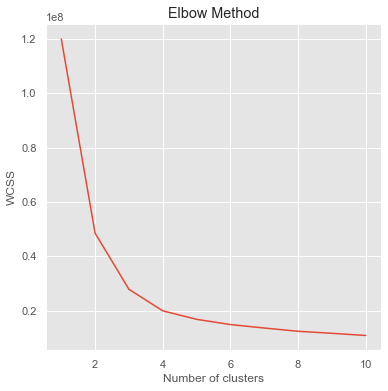

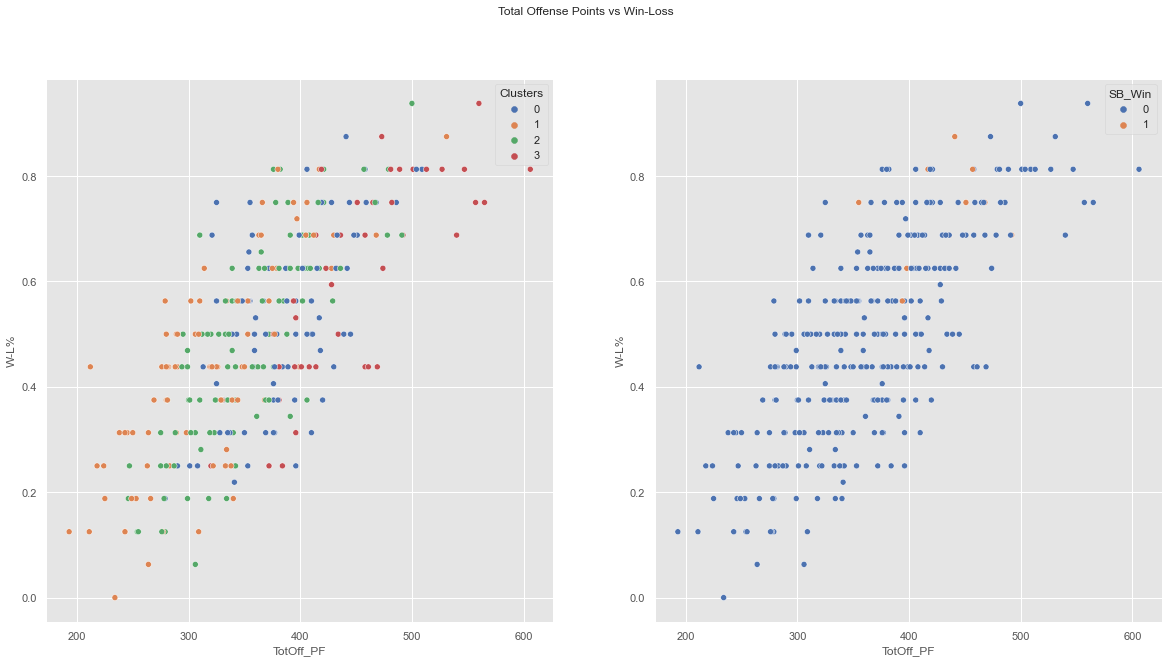

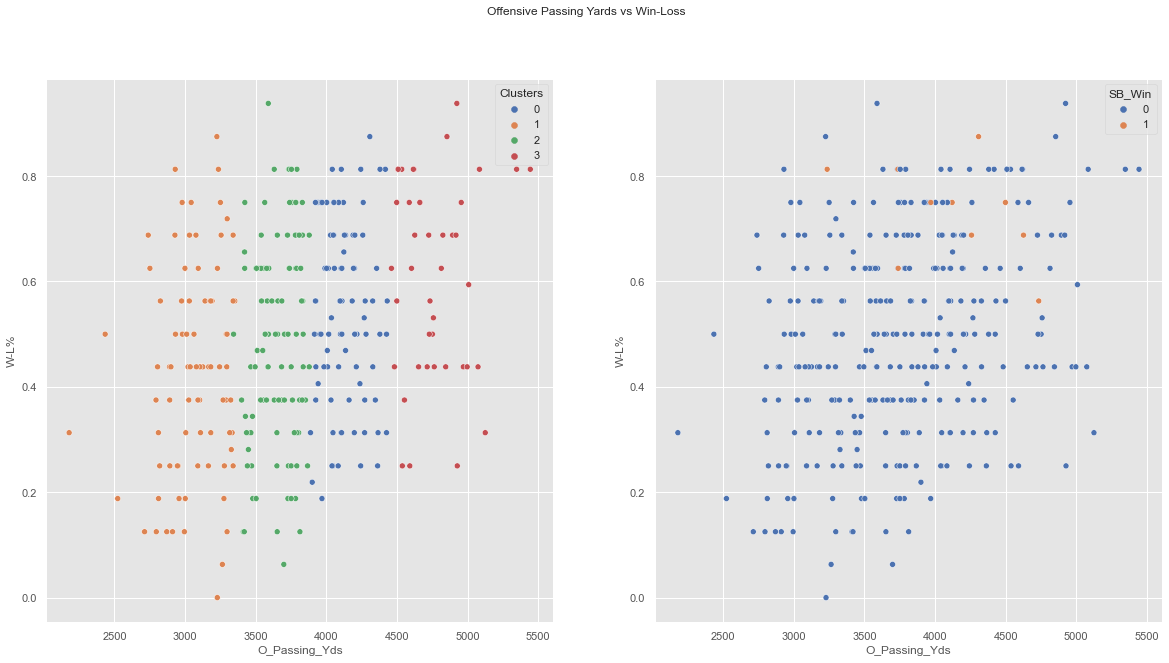

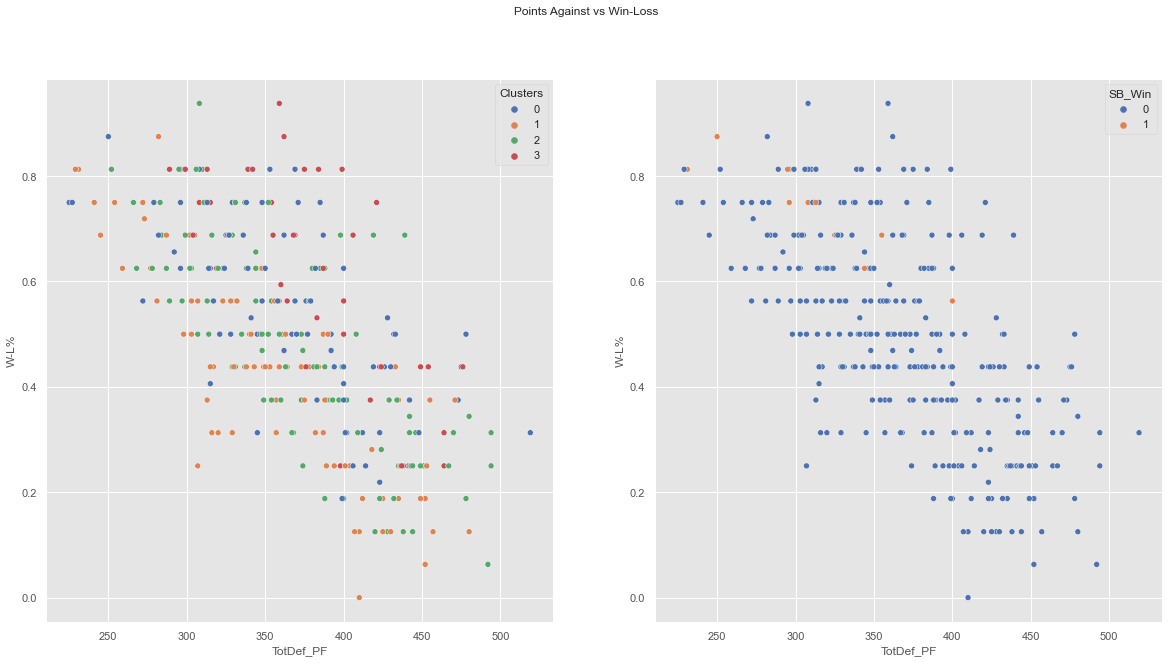

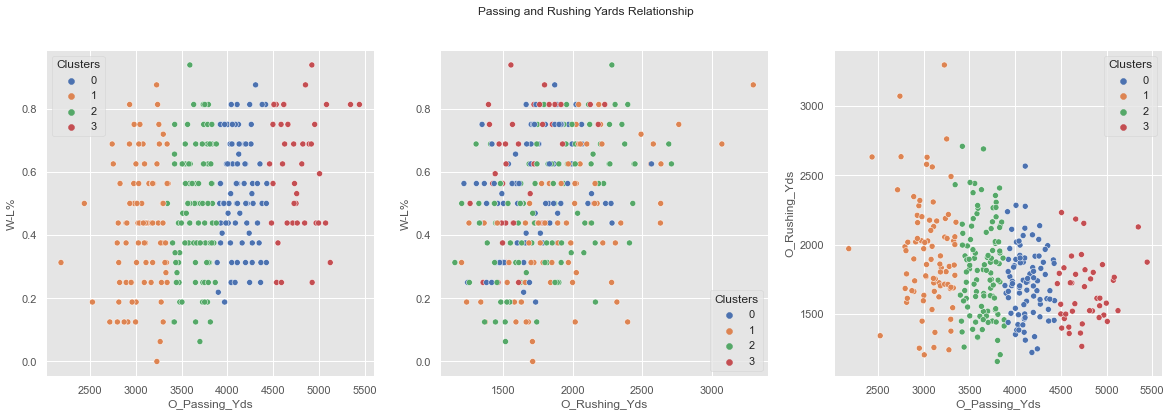

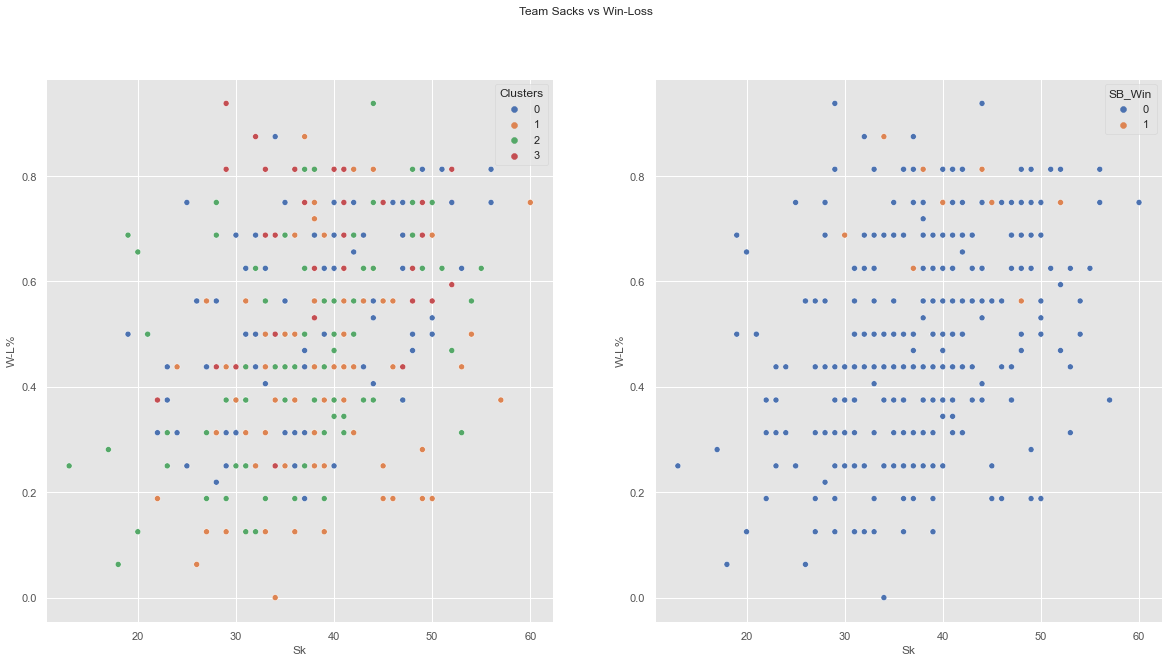

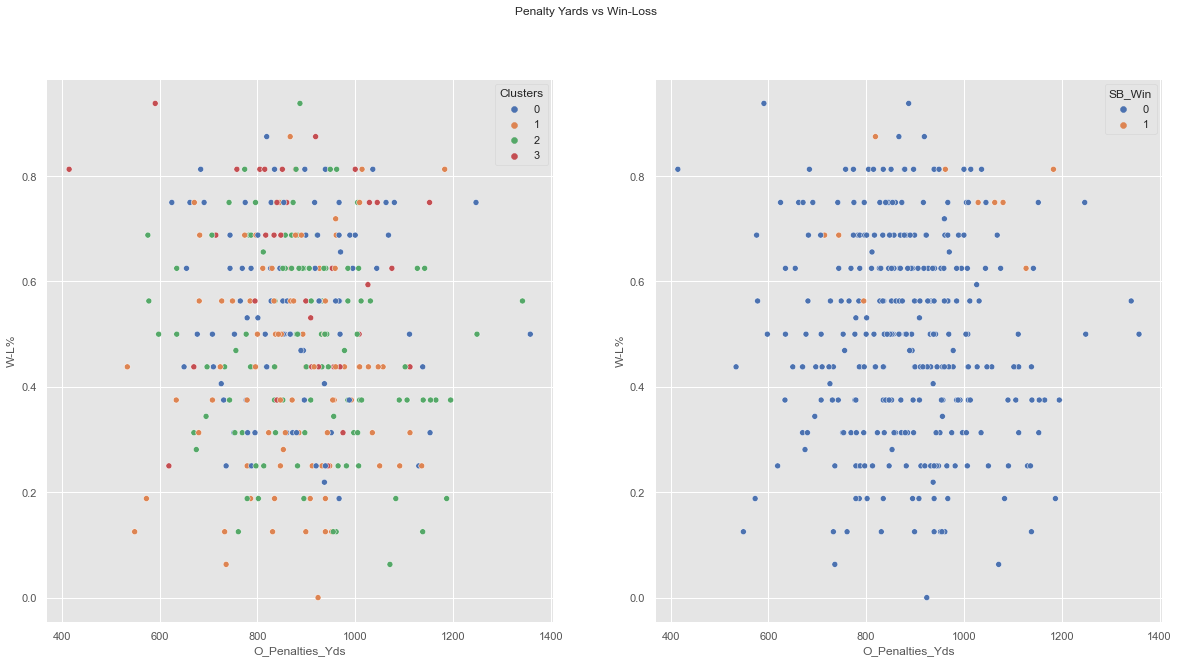

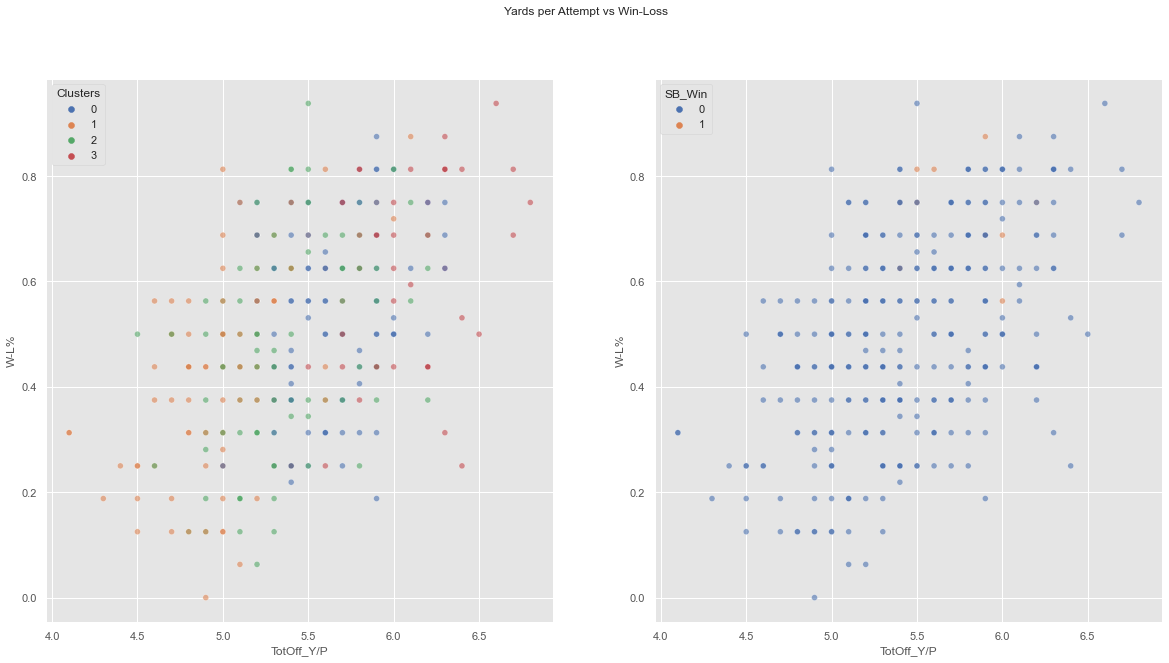

In [4]:
#elbow method
plt.rcParams['figure.figsize'] = (6, 6)
plt.style.use('ggplot')
wcss = []
for i in range(1, 11):
    model = KMeans(n_clusters=i, init='random', max_iter=300, n_init=10, random_state=0)
    model.fit(DF_new.drop('Tm',axis=1))
    wcss.append(model.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

model = KMeans(n_clusters=4, init='random', max_iter=300, n_init=10, random_state=0)
model.fit(DF_new.drop('Tm',axis=1))
y_pred = model.fit_predict(DF_new.drop('Tm',axis=1))
DF_new['Clusters'] = y_pred


plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('ggplot')
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Total Offense Points vs Win-Loss')
sns.scatterplot(ax = ax1, data=DF_new, x=DF['TotOff_PF'], y=DF['W-L%'], hue ='Clusters',palette='deep')
sns.scatterplot(ax = ax2, data=DF_new, x=DF['TotOff_PF'], y=DF['W-L%'], hue ='SB_Win',palette='deep')
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Offensive Passing Yards vs Win-Loss')
sns.scatterplot(ax = ax1, data=DF_new, x=DF['O_Passing_Yds'], y=DF['W-L%'], hue ='Clusters',palette='deep')
sns.scatterplot(ax = ax2, data=DF_new, x=DF['O_Passing_Yds'], y=DF['W-L%'], hue ='SB_Win',palette='deep')
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Points Against vs Win-Loss')
sns.scatterplot(ax = ax1, data=DF_new, x=DF['TotDef_PF'], y=DF['W-L%'], hue ='Clusters',palette='deep')
sns.scatterplot(ax = ax2, data=DF_new, x=DF['TotDef_PF'], y=DF['W-L%'], hue ='SB_Win',palette='deep')
plt.show()

plt.rcParams['figure.figsize'] = (20, 6)
plt.style.use('ggplot')
fig, (ax1, ax2,ax3) = plt.subplots(1, 3)
fig.suptitle('Passing and Rushing Yards Relationship')
sns.scatterplot(ax = ax1, data=DF_new, x=DF['O_Passing_Yds'], y=DF['W-L%'], hue ='Clusters',palette='deep')
sns.scatterplot(ax = ax2, data=DF_new, x=DF['O_Rushing_Yds'], y=DF['W-L%'], hue ='Clusters',palette='deep')
sns.scatterplot(ax = ax3, data=DF_new, x=DF['O_Passing_Yds'], y=DF['O_Rushing_Yds'], hue ='Clusters',palette='deep')
plt.show()

plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('ggplot')
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Team Sacks vs Win-Loss')
sns.scatterplot(ax = ax1, data=DF_new, x=DF['Sk'], y=DF['W-L%'], hue ='Clusters',palette='deep')
sns.scatterplot(ax = ax2, data=DF_new, x=DF['Sk'], y=DF['W-L%'], hue ='SB_Win',palette='deep')
plt.show()

plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('ggplot')
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Penalty Yards vs Win-Loss')
sns.scatterplot(ax = ax1, data=DF_new, x=DF['O_Penalties_Yds'], y=DF['W-L%'], hue ='Clusters',palette='deep')
sns.scatterplot(ax = ax2, data=DF_new, x=DF['O_Penalties_Yds'], y=DF['W-L%'], hue ='SB_Win',palette='deep')
plt.show()

plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('ggplot')
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Yards per Attempt vs Win-Loss')
sns.scatterplot(ax = ax1, data=DF_new, x=DF['TotOff_Y/P'], y=DF['W-L%'], hue ='Clusters',palette='deep',alpha=0.6)
sns.scatterplot(ax = ax2, data=DF_new, x=DF['TotOff_Y/P'], y=DF['W-L%'], hue ='SB_Win',palette='deep',alpha=0.6)
plt.show()